# Time Series Components

Remember the weekly time series that you formed in Milestone 1? We would like to understand a bit more about this time series. There are certain aspects of a time series that cannot necessarily be gleaned from simply “eye-balling” a plot of the series.

Your objectives in this milestone are the following:

- Decompose the time series and plot its components.
- Generate autocorrelation and partial autocorrelation plots for the time series.
- Calculate a 4-week moving average on the time series and plot this moving average against the actual time series. Note that the selection of a 4-week moving average is arbitrary. It is used in this case to provide a better visual representation of the longer-term trend.

## Deliverable: 
- Decomposition of the time series and plots of the trend, residual, and seasonal components
- Autocorrelation and partial autocorrelation plots of the time series
- A 4-period SMA plotted against the actual time series
- A 90/10 train-test split

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Set pandas options to display more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show up to 50 rows

In [2]:
df = pd.read_csv('data/H1.csv')
df = df.sort_values(by=['ArrivalDateYear', 'ArrivalDateWeekNumber'])
df['Date_Year_Week'] = df['ArrivalDateYear'].astype(str) + df['ArrivalDateWeekNumber'].astype(str)

cancellations_per_week = df.groupby('Date_Year_Week')['IsCanceled'].sum().reset_index()

In [3]:
cancellations_per_week

,Date_Year_Week,IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101
...,...,...
110,20175,51
111,20176,91
112,20177,96
113,20178,128


## 0. Plot timeseries

In [4]:
# Plot hotel cancellations per week
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(
        x=cancellations_per_week['Date_Year_Week'],
        y=cancellations_per_week['IsCanceled'],
        mode='lines',
        name='Cancellations',
        line=dict(color='#1f77b4', width=2)
    )
)

# Update layout
fig.update_layout(
    title='Hotel cancellations per week (2015-2017)',
    xaxis_title='Year-Week',
    yaxis_title='Number of Cancellations',
    template='plotly_white',
    showlegend=False,
    width=1000,
    height=600
)

# Update hover template
fig.update_traces(
    hovertemplate='Week: %{x}<br>Cancellations: %{y}<extra></extra>'
)

fig.show()

## 1. Decompose time series

In [5]:
# Seasonal decompose
decomposition = seasonal_decompose(cancellations_per_week['IsCanceled'], model='additive', period=52)

fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"])

fig.add_trace(
    go.Scatter(x=decomposition.seasonal.index, y=decomposition.observed, mode='lines'),
        row=1, col=1,
    )
fig.add_trace(
    go.Scatter(x=decomposition.trend.index, y=decomposition.trend, mode='lines'),
        row=2, col=1,
    )
fig.add_trace(
    go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, mode='lines'),
        row=3, col=1,
    )
fig.add_trace(
    go.Scatter(x=decomposition.resid.index, y=decomposition.resid, mode='lines'),
        row=4, col=1,
    )


fig.update_layout(
    height=1000
)

# 2. Autocorrelation and partial autocorrelation plots

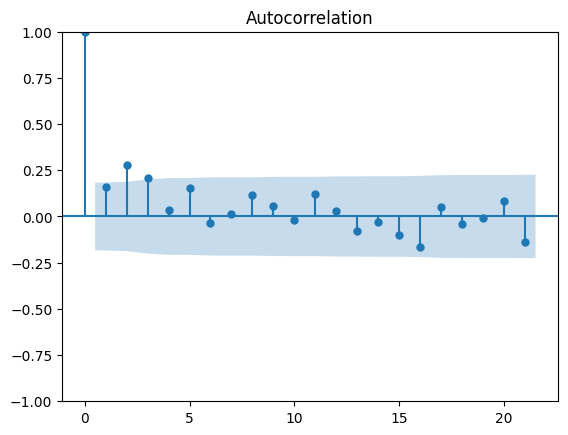

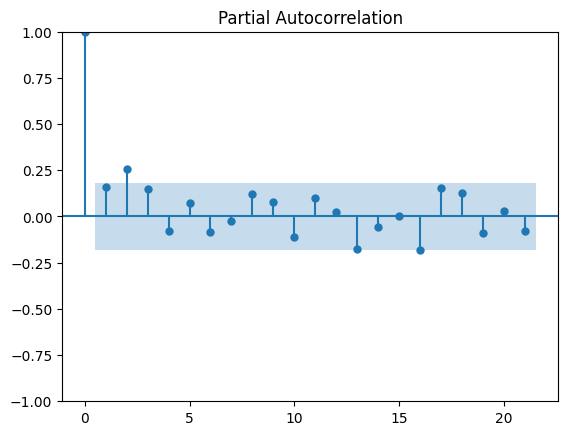

In [9]:
acf = plot_acf(cancellations_per_week['IsCanceled'])
pacf = plot_pacf(cancellations_per_week['IsCanceled'])

# 3. Calculate 4-week moving average

In [16]:
periods = 4

cancellations_per_week['4-week_SMA'] = cancellations_per_week['IsCanceled'].rolling(window=periods).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cancellations_per_week['Date_Year_Week'],
    y=cancellations_per_week['IsCanceled'],
    mode='lines',
    name='Actual'
))

fig.add_trace(go.Scatter(
    x=cancellations_per_week['Date_Year_Week'],
    y=cancellations_per_week['4-week_SMA'],
    mode='lines',
    name=f"{periods}-week SMA"
))

# Update layout
fig.update_layout(
    title=f"Hotel cancellations - actuals vs smoothed average {periods} weeks period",
    xaxis_title='Year-Week',
    yaxis_title='Number of Cancellations',
    template='plotly_white',
    showlegend=False,
    width=1000,
    height=600
)


# 4. Train-test split

In [ ]:
# Calculate split point at 90% of data. This plot shows there's potentially data missing :).

split_point = int(len(cancellations_per_week) * 0.9)

# Split the data
train = cancellations_per_week.iloc[:split_point]
test = cancellations_per_week.iloc[split_point:]

print(f"Training set size: {len(train)} observations")
print(f"Test set size: {len(test)} observations") 

# Plot the split
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=train['Date_Year_Week'],
    y=train['IsCanceled'],
    mode='lines',
    name='Training Data'
))

fig.add_trace(go.Scatter(
    x=test['Date_Year_Week'], 
    y=test['IsCanceled'],
    mode='lines',
    name='Test Data'
))

fig.update_layout(
    title='Train-Test Split of Hotel Cancellations Time Series',
    xaxis_title='Year-Week',
    yaxis_title='Number of Cancellations',
    template='plotly_white',
    width=1000,
    height=600
)


Training set size: 103 observations
Test set size: 12 observations
